### Nidhi Sehgal 
### DAB July 2025

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [84]:
os.getcwd()

'C:\\Users\\prati'

In [85]:
# importing multiple files and starting your analysis
# Load all three CSV files

import pandas as pd
import glob

#1. Get all CSV file paths from a folder
csv_files = glob.glob("*.csv")



In [86]:
## STEP 1: Load your data
# Always start by loading your CSV files and checking what you have
# Tip: Use len() to see how many rows you have in each dataset

customers = pd.read_csv(r"c:\Users\prati\Downloads\customers-1-1.csv")
products =  pd.read_csv(r"c:\Users\prati\Downloads\products.csv")
sales =  pd.read_csv(r"c:\Users\prati\Downloads\sales.csv")

In [87]:
print(f"✅ Data loaded successfully:")
print(f"   - {len(customers)} customers")
print(f"   - {len(products)} products") 
print(f"   - {len(sales)} sales transactions")


✅ Data loaded successfully:
   - 100 customers
   - 60 products
   - 150 sales transactions


In [88]:
print(customers.head())

   customer_id first_name last_name  age state  income registration_date  \
0            1       John     Smith   34    CA   75000        2022-01-15   
1            2      Sarah   Johnson   28    NY   82000        2022-01-22   
2            3    Michael     Brown   45    TX   95000        2022-02-03   
3            4      Emily     Davis   31    FL   68000        2022-02-14   
4            5      David    Wilson   52    IL  110000        2022-02-28   

                     email  
0     john.smith@email.com  
1  sarah.johnson@email.com  
2  michael.brown@email.com  
3    emily.davis@email.com  
4   david.wilson@email.com  


In [89]:
print(products.head())

   product_id                   product_name           category  price  \
0           1  Wireless Bluetooth Headphones        Electronics  79.99   
1           2         Organic Cotton T-Shirt           Clothing  24.99   
2           3   Stainless Steel Water Bottle      Home & Garden  19.99   
3           4          Leather Crossbody Bag        Accessories  89.99   
4           5               Yoga Mat Premium  Sports & Outdoors  34.99   

  launch_date       brand  
0  2021-03-15   AudioTech  
1  2021-04-20     EcoWear  
2  2021-05-10   HydroLife  
3  2021-06-01  StyleCraft  
4  2021-06-15     FitZone  


In [90]:
print(sales.head())

   sale_id  customer_id  product_id     transaction_date  quantity  \
0        1            1           1  2022-02-10 14:30:00         1   
1        2            2           3  2022-02-15 10:15:00         2   
2        3            3           5  2022-02-20 16:45:00         1   
3        4            4           2  2022-02-25 11:20:00         3   
4        5            5           4  2022-03-01 13:10:00         1   

   total_amount  
0         79.99  
1         39.98  
2         34.99  
3         74.97  
4         89.99  


In [91]:
# STEP 2: Prepare date columns for analysis
# Convert string dates to datetime objects so we can extract day names, months, etc.
# Pandas to_datetime() function is your friend here!

customers['registration_date'] = pd.to_datetime(customers['registration_date'])
products['launch_date'] = pd.to_datetime(products['launch_date'])
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])


In [92]:
# STEP 3: Extract useful information from dates
# We want to analyze patterns by day of the week, so extract day names
# Hint: Use .dt.day_name() to get 'Monday', 'Tuesday', etc.
sales['year'] = sales['transaction_date'].dt.year
sales['month'] = sales['transaction_date'].dt.month
sales['day_of_week'] = sales['transaction_date'].dt.dayofweek
sales['day_name'] = sales['transaction_date'].dt.day_name()


In [110]:
# Chart 1 Data: Revenue by product category
# We need to combine sales data with product category information
# Use merge() to join sales with products, then group by category and sum revenue

sales_with_category = sales.merge(products[['product_id', 'category']], on='product_id')
category_revenue = sales_with_category.groupby('category')['total_amount'].sum().sort_values(ascending=False)


In [94]:
# Chart 2 Data: Customer count by state  
# Count how many customers are in each state
# Use value_counts() - it's perfect for counting occurrences!

state_customer_counts = customers['state'].value_counts()


In [95]:
# Chart 3 Data: Daily transaction patterns
# Calculate average transaction amount for each day of the week
# Define the order of days so our chart shows Monday through Sunday


day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg_amount = sales.groupby('day_name')['total_amount'].mean().reindex(day_order)

# Fill any missing days with 0 (in case no transactions happened on certain days)
daily_avg_amount = daily_avg_amount.fillna(0)


In [96]:
# Chart 4 Data: Transaction amounts for distribution analysis
# We'll use this to create a histogram showing the spread of transaction values

transaction_amounts = sales['total_amount']

In [97]:
print(f"✅ Data preparation complete:")
print(f"   - {len(category_revenue)} product categories")
print(f"   - {len(state_customer_counts)} states represented")
print(f"   - Transaction range: ${transaction_amounts.min():.2f} - ${transaction_amounts.max():.2f}")

✅ Data preparation complete:
   - 5 product categories
   - 5 states represented
   - Transaction range: $12.99 - $319.98


In [98]:
# STEP 5: Set up professional styling
# Before creating charts, set a consistent style for the entire notebook
# sns.set_theme() controls the overall look of all your seaborn plots

# Choose a clean, professional style:
# - "whitegrid" gives a clean white background with subtle grid lines
# - "talk" context makes fonts and elements larger (good for presentations)
sns.set_theme(
    style="whitegrid",      # Clean white background with subtle grid lines
    context="talk"          # Larger fonts and elements for presentations
)

# Fine-tune some matplotlib settings for extra polish
# These settings make the charts look more professional
plt.rcParams.update({
    'figure.facecolor': 'white',        # White background for the entire figure
    'axes.facecolor': 'white',          # White background for each chart
    'font.family': 'DejaVu Sans',       # Professional, readable font
    'axes.spines.top': False,           # Remove top border (cleaner look)
    'axes.spines.right': False,         # Remove right border (cleaner look)
})

In [99]:
sns.set_theme(
    style="whitegrid",     
    context="talk"  )

In [100]:
plt.rcParams.update({
    'figure.facecolor': 'white',      
    'axes.facecolor': 'white',         
    'font.family': 'DejaVu Sans',    
    'axes.spines.top': False,           
    'axes.spines.right': False,        
})

In [101]:

print("\n" + "=" * 60)
print("CHALLENGE: EXECUTIVE SUMMARY DASHBOARD")
print("=" * 60)

print("📊 Creating Executive Dashboard with actual workshop data...")



CHALLENGE: EXECUTIVE SUMMARY DASHBOARD
📊 Creating Executive Dashboard with actual workshop data...


In [102]:
# Display key statistics first (always good to understand your data!)
print(f"\n📈 Workshop Data Overview:")
print(f"   • Total Revenue: ${sales['total_amount'].sum():,.2f}")
print(f"   • Average Transaction: ${sales['total_amount'].mean():.2f}")
print(f"   • Product Categories: {products['category'].nunique()}")
print(f"   • States Represented: {customers['state'].nunique()}")



📈 Workshop Data Overview:
   • Total Revenue: $13,409.03
   • Average Transaction: $89.39
   • Product Categories: 5
   • States Represented: 5


Text(0.5, 0.98, 'Sales Performance Dashboard')

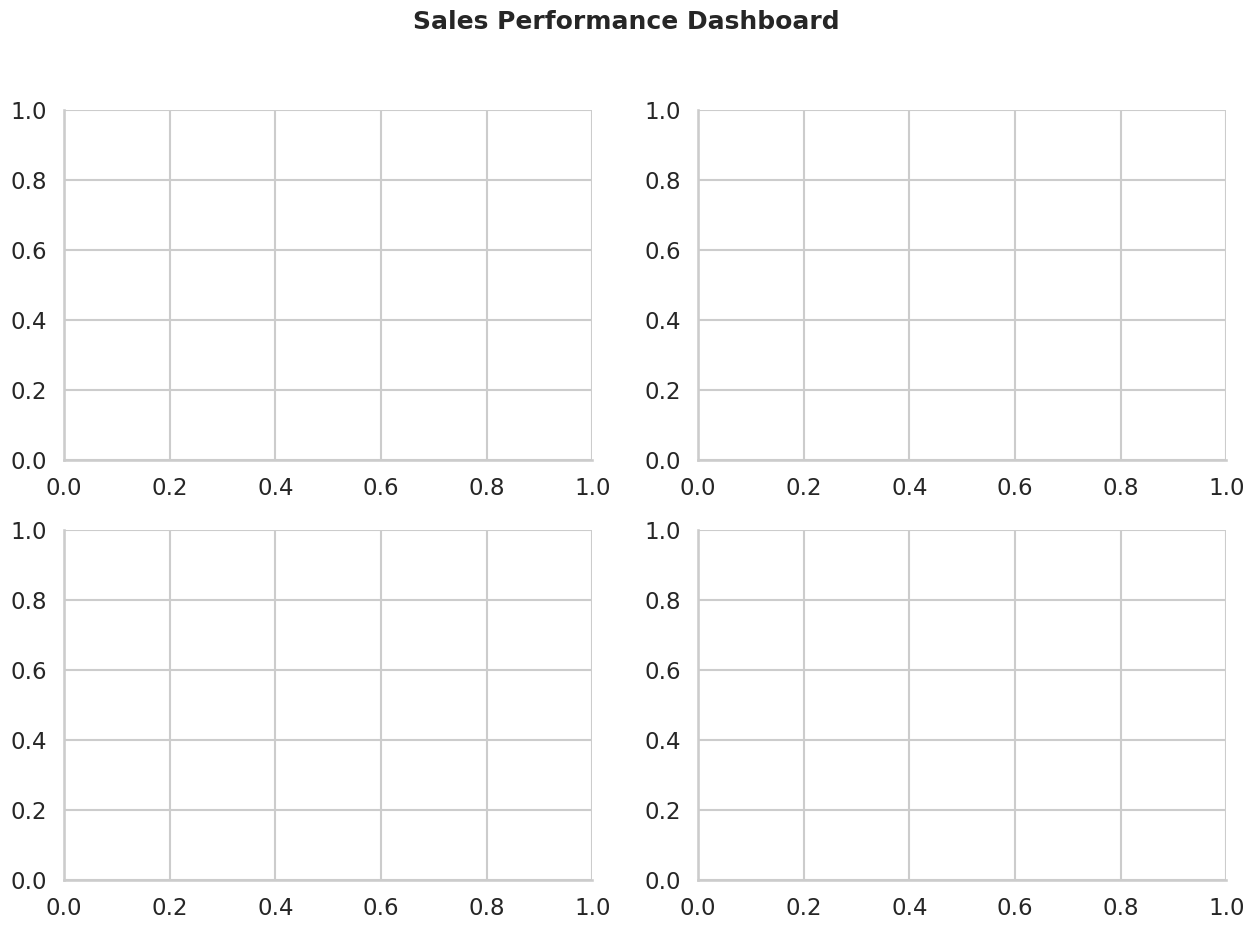

In [103]:
# STEP 1: Create the dashboard structure
# plt.subplots() creates multiple charts in one figure
# (2, 2) means 2 rows and 2 columns = 4 charts total
# figsize controls the overall size - larger numbers = bigger dashboard

# TODO: Create a 2x2 subplot structure with figsize=(15, 10)
# Hint: fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(?, ?, figsize=(?))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Add a main title that spans the entire dashboard
# Hint: Use fig.suptitle() with appropriate fontsize and fontweight

fig.suptitle('Sales Performance Dashboard', fontsize=18, fontweight='bold')

<Figure size 640x480 with 0 Axes>

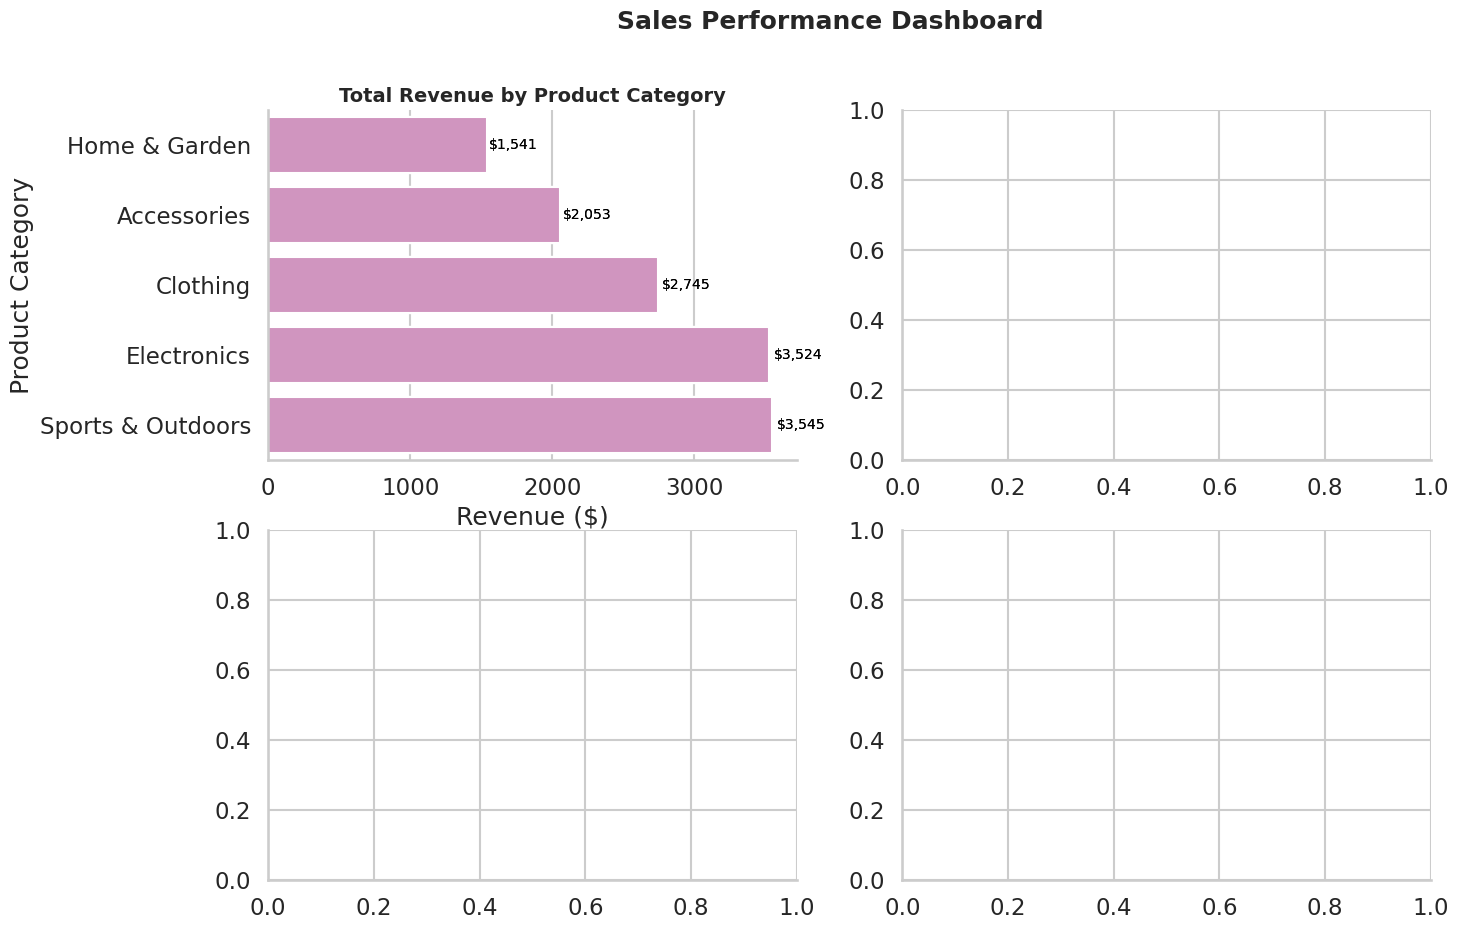

In [121]:
# CHART 1 (TOP LEFT): Revenue by Product Category
# =============================================================================
# BUSINESS QUESTION: Which product categories generate the most revenue?
# CHART TYPE: Horizontal bar chart (good for comparing categories)
# 
# WHY HORIZONTAL? When category names are long, horizontal bars are easier to read
# The data is already sorted from highest to lowest revenue (we did this earlier!)

# TODO: Create a horizontal bar chart using seaborn
# Hint: sns.barplot(x=category_revenue.values, y=category_revenue.index, ax=ax1)

# YOUR CODE HERE
# Chart 1 Data: Revenue by product category
# We need to combine sales data with product category information
# Use merge() to join sales with products, then group by category and sum revenue

sales_with_category = sales.merge(products[['product_id', 'category']], on='product_id')


# Group, sum, and sort revenue by category
category_revenue = (
    sales_with_category
    .groupby('category')['total_amount']
    .sum()
    .reset_index()
    .sort_values('total_amount', ascending=True)  # ascending for bottom-up bars
)

# Create the bar chart
sns.barplot(
    data=category_revenue,
    x='total_amount',
    y='category',
    ax=ax1,
)


# TODO: Add clear, descriptive titles and labels
# Hint: Use ax1.set_title(), ax1.set_xlabel(), ax1.set_ylabel()
# Remember: Titles should answer "What am I looking at?"
# Labels should specify units (dollars, counts, etc.)

# Add title and axis labels
ax1.set_title('Total Revenue by Product Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('Revenue ($)')
ax1.set_ylabel('Product Category')

# Optional: improve layout
plt.tight_layout()
plt.show()
fig


<Figure size 640x480 with 0 Axes>

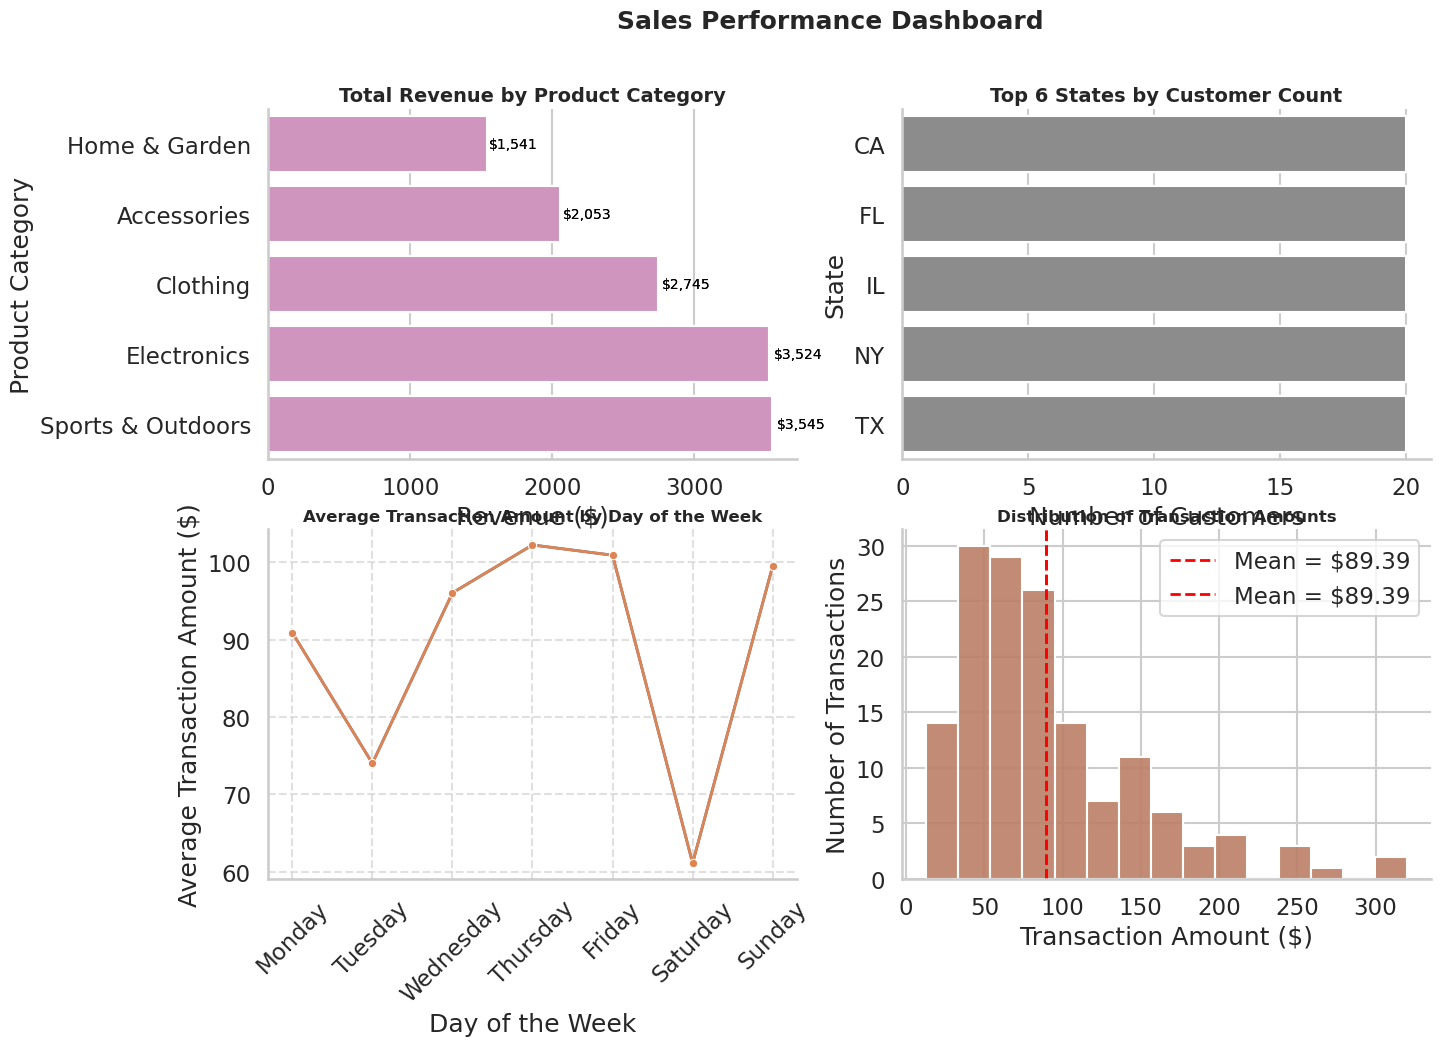

In [137]:
# CHART 2 (TOP RIGHT): Customer Count by State
# =============================================================================
# BUSINESS QUESTION: Where are most of our customers located?
# CHART TYPE: Horizontal bar chart (good for geographic comparisons)
#
# We're showing only the top 6 states to keep the chart readable
# Too many bars makes charts cluttered and hard to interpret

# TODO: Select top 6 states (data is already sorted by value_counts())
# Hint: top_states = state_customer_counts.head(?)

# Group and count customers per state
customers_state = (
    customers.groupby('state')['customer_id']
    .nunique()                            # count unique customers
    .reset_index()
    .rename(columns={'customer_id': 'Customer_Count'})
    .sort_values('Customer_Count', ascending=False)
    .head(6)                              # top 6 states only
)

# Create the horizontal bar chart
sns.barplot(
    data=customers_state,
    x='Customer_Count',
    y='state',
    ax=ax2,
)


# TODO: Add appropriate title and labels for the state chart
# YOUR CODE HERE

# Add titles and labels
ax2.set_title('Top 6 States by Customer Count', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Customers')
ax2.set_ylabel('State')


# TODO: Create horizontal bar chart for state data
# Hint: sns.barplot(x=top_states.values, y=top_states.index, ax=ax2)



# Optional: improve layout
plt.tight_layout()
plt.show()
fig


<Figure size 640x480 with 0 Axes>

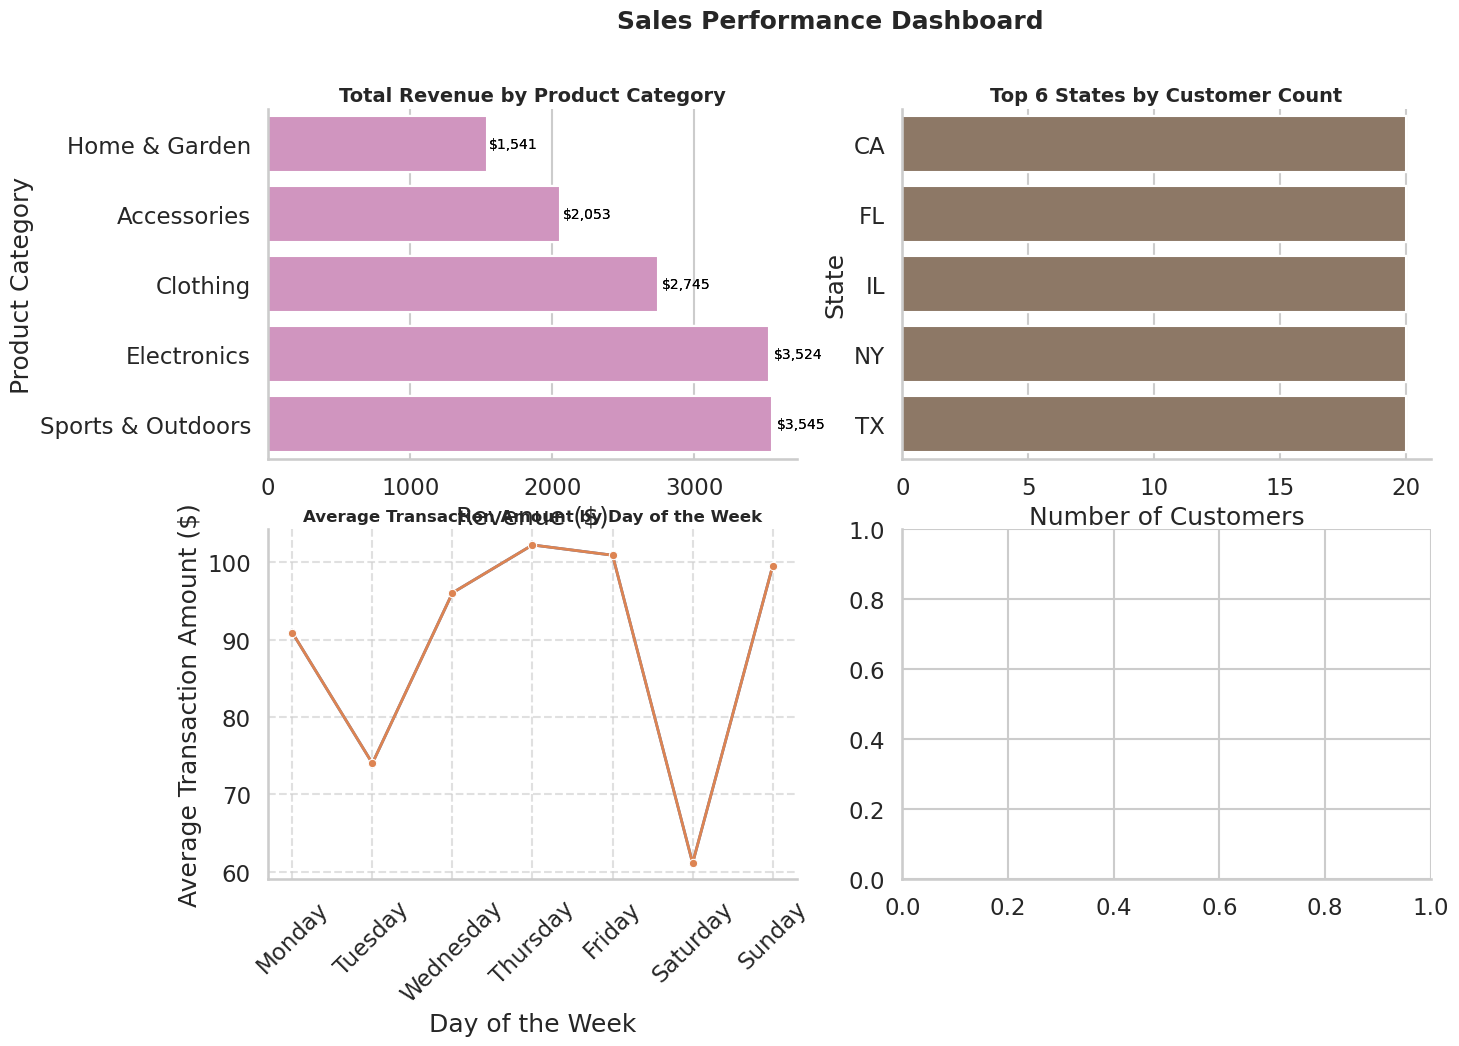

In [133]:
# CHART 3 (BOTTOM LEFT): Daily Transaction Trends  
# =============================================================================
# BUSINESS QUESTION: Do transaction amounts vary by day of the week?
# CHART TYPE: Line chart (perfect for showing trends over time/sequence)
#
# Line charts are ideal when you want to show:
# - Trends over time
# - Patterns in sequential data
# - Connections between data points

# TODO: Create a line chart with markers (dots) at each point
# Hint: ax3.plot(range(len(daily_avg_amount)), daily_avg_amount.values, marker='o', linewidth=2, markersize=6)
# range(len(daily_avg_amount)) creates x-positions: 0, 1, 2, 3, 4, 5, 6
# daily_avg_amount.values provides the y-values (average amounts)

# YOUR CODE HERE

# TODO: Add title and labels for the daily trends chart

# YOUR CODE HERE

# TODO: Set up the x-axis to show day names instead of numbers
# Hint: Use ax3.set_xticks() and ax3.set_xticklabels()
# You might want to rotate the labels with rotation=45 for better fit
# Step 1: Convert transaction date to datetime (if not already)
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])

# Step 2: Extract day of the week name
sales['day_of_week'] = sales['transaction_date'].dt.day_name()

# Step 3: Group by day and calculate average transaction value
daily_avg = sales.groupby('day_of_week')['total_amount'].mean().reset_index()

# Step 4: Ensure days are in correct order (Monday → Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg['day_of_week'] = pd.Categorical(daily_avg['day_of_week'], categories=day_order, ordered=True)
daily_avg = daily_avg.sort_values('day_of_week')



# Fill any missing days with 0 (in case no transactions happened on certain days)
daily_avg_amount = daily_avg_amount.fillna(0)


# Step 5: Create the line chart
sns.lineplot(
    data=daily_avg ,
    x='day_of_week',
    y='total_amount',
    marker='o',
    linewidth=2,
    markersize=6,
    ax=ax3
)

# Step 6: Customize the chart
ax3.set_title('Average Transaction Amount by Day of the Week', fontsize=12, fontweight='bold')
ax3.set_xlabel('Day of the Week')
ax3.set_ylabel('Average Transaction Amount ($)')
ax3.grid(True, linestyle='--', alpha=0.6)
ax3.tick_params(axis='x', rotation=45)


# Optional: improve layout
plt.tight_layout()
plt.show()
fig

<Figure size 640x480 with 0 Axes>

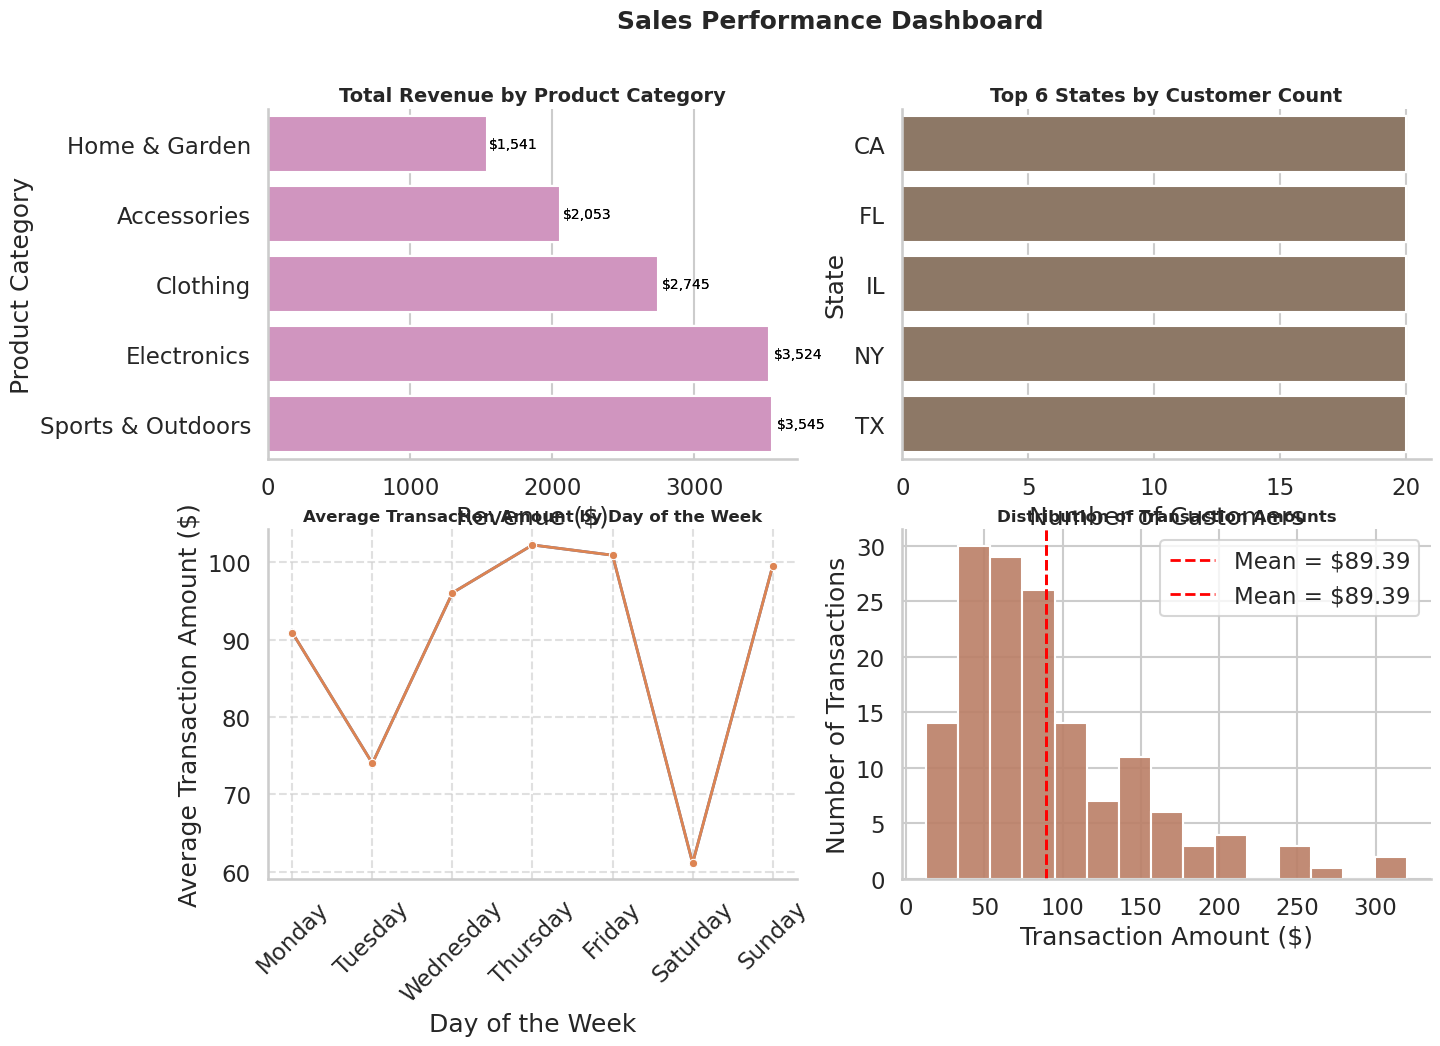

In [135]:
# CHART 4 (BOTTOM RIGHT): Transaction Amount Distribution
# =============================================================================
# BUSINESS QUESTION: What is the distribution of transaction amounts?
# INSIGHT GOAL: Understand whether most transactions are small or large, and spot outliers.
# CHART TYPE: Histogram (perfect for showing distribution of continuous data)
#
# Histograms help you understand:
# - What's the most common value?
# - How spread out is the data?
# - Are there any outliers?

# TODO: Create histogram showing distribution of transaction amounts
# Hint: sns.histplot(transaction_amounts, bins=15, ax=ax4, alpha=0.7)
# bins=15 creates 15 bins (bars) - not too few (lose detail) or too many (noisy)
# alpha=0.7 makes bars slightly transparent (looks more professional)

# YOUR CODE HERE
# Step 1: Calculate mean transaction amount
mean_value = sales['total_amount'].mean()

# Step 2: Create histogram
sns.histplot(
    data=sales,
    x='total_amount',
    bins=15,            # Adjust number of bins for clarity
    ax=ax4,
    alpha=0.7
)
# TODO: Add title and labels for the histogram

# TODO: Add a reference line showing the average (mean) transaction amount
# This helps viewers understand what's "typical"
# Hint: Calculate mean_amount = transaction_amounts.mean()
# Then use ax4.axvline() to draw a vertical line at the mean value
# Use color='red', linestyle='--', linewidth=2 for visibility
# Add a label for the legend: label=f'Mean: ${mean_amount:.2f}'

 # Step 3: Add mean reference line
ax4.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean = ${mean_value:.2f}')

# TODO: Add legend so viewers know what the red line represents
# Hint: ax4.legend()

# Step 4: Customize chart
ax4.set_title('Distribution of Transaction Amounts', fontsize=12, fontweight='bold')
ax4.set_xlabel('Transaction Amount ($)')
ax4.set_ylabel('Number of Transactions')
ax4.legend()

# Optional: improve layout
plt.tight_layout()
plt.show()
fig

In [139]:
#BONUS CHALLENGE: ADVANCED LAYERED VISUALIZATION 
# =============================================================================
# GOAL: Create a sophisticated multi-layer business analysis visualization
# that combines multiple chart elements and data sources to tell a complete story
#
# BUSINESS QUESTION: How does customer income relate to spending behavior?
# 
# LAYERED VISUALIZATION STRUCTURE:
# Layer 1: Foundation scatter plot (customer income vs total spending)
# Layer 2: Statistical trend line (regression with confidence interval)
# Layer 3: Categorical overlay (color coding by age groups)
# Layer 4: Statistical annotations (correlation, insights, thresholds)
# Layer 5: Business context (reference lines, targets)
#
# ADVANCED SKILLS: Multi-source data merging, categorical color coding,
# multiple statistical overlays, business threshold lines, comprehensive annotations
# =============================================================================

print(f"\n" + "=" * 60)
print("CHALLENGE 2: ADVANCED LAYERED VISUALIZATION")
print("=" * 60)

print("📊 Creating advanced business intelligence visualization...")
print("🎯 Analyzing customer income vs spending patterns with multiple data layers")



CHALLENGE 2: ADVANCED LAYERED VISUALIZATION
📊 Creating advanced business intelligence visualization...
🎯 Analyzing customer income vs spending patterns with multiple data layers


In [148]:
# STEP 1: Data Preparation for Layered Analysis
# =============================================================================
print("\n🔄 Preparing data for advanced layered visualization...")

# 1️⃣ Calculate total spending and purchase count per customer
customer_spending = sales.groupby('customer_id')['total_amount'].agg(['sum', 'count']).reset_index()
customer_spending.columns = ['customer_id', 'total_spent', 'purchase_count']

# 2️⃣ Merge customer information with their spending data
customer_analysis = customers.merge(customer_spending, on='customer_id', how='left')

# Fill NaN values for customers who haven't made purchases
customer_analysis[['total_spent', 'purchase_count']] = customer_analysis[['total_spent', 'purchase_count']].fillna(0)

# 3️⃣ Create age groups for categorical analysis
customer_analysis['age_group'] = pd.cut(
    customer_analysis['age'],
    bins=[0, 30, 45, 60, 100],
    labels=['Under 30', '30-45', '46-60', 'Over 60']
)

print(f"✅ Data preparation complete:")
print(f"   - Customer spending analysis ready")
print(f"   - Age groups created for categorical analysis")
print(f"   - Ready for multi-layer visualization")


🔄 Preparing data for advanced layered visualization...
✅ Data preparation complete:
   - Customer spending analysis ready
   - Age groups created for categorical analysis
   - Ready for multi-layer visualization


📍 Adding Layer 1: Customer scatter plot with age group colors...


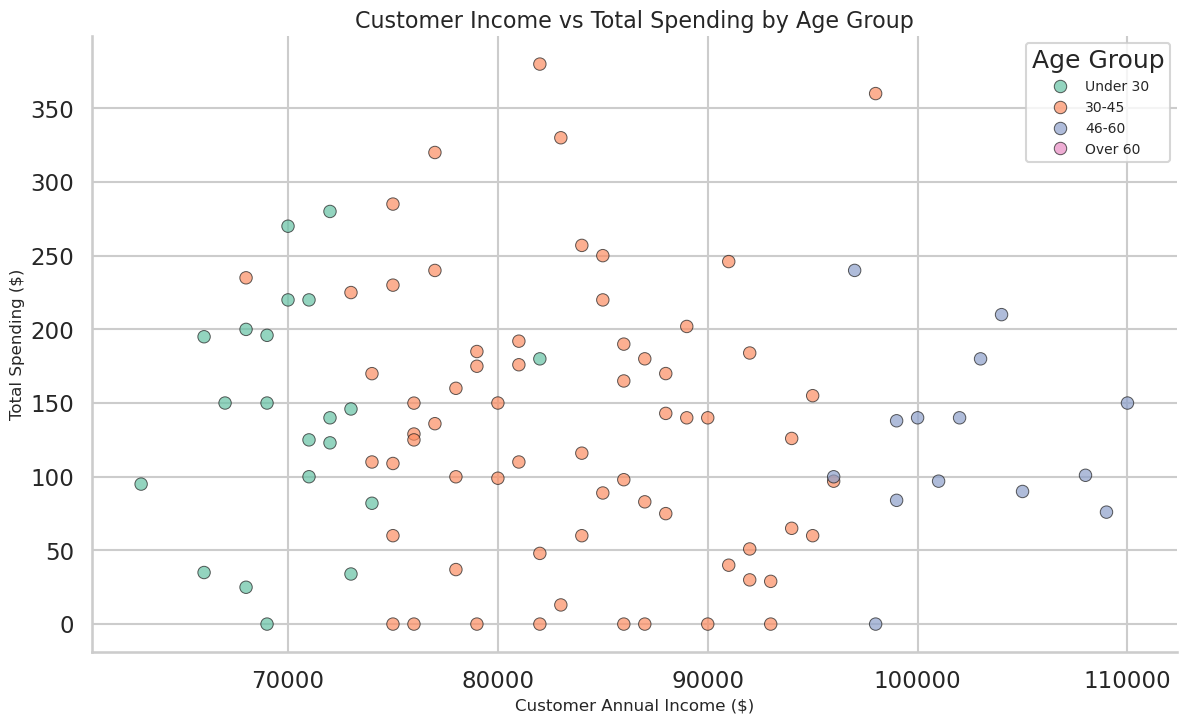

In [149]:
#Create a larger figure to accommodate multiple layers
fig, ax = plt.subplots(figsize=(14, 8))

# =============================================================================
# LAYER 1: Foundation Scatter Plot with Categorical Color Coding
# =============================================================================
print("📍 Adding Layer 1: Customer scatter plot with age group colors...")

# 2️⃣ Scatter plot: income vs total spending, colored by age group
sns.scatterplot(
    data=customer_analysis,
    x='income',
    y='total_spent',
    hue='age_group',   # categorical overlay
    palette='Set2',    # nice distinct colors for age groups
    alpha=0.7,         # slight transparency
    s=80,              # larger points
    edgecolor='k',     # optional: black edge for points
    ax=ax
)

# Optional: set axis labels and title for clarity
ax.set_title("Customer Income vs Total Spending by Age Group", fontsize=16)
ax.set_xlabel("Customer Annual Income ($)", fontsize=12)
ax.set_ylabel("Total Spending ($)", fontsize=12)

plt.legend(title='Age Group', fontsize=10)
plt.show()

📈 Adding Layer 2: Overall trend line...
📈 Adding Layer 2: Overall trend line...


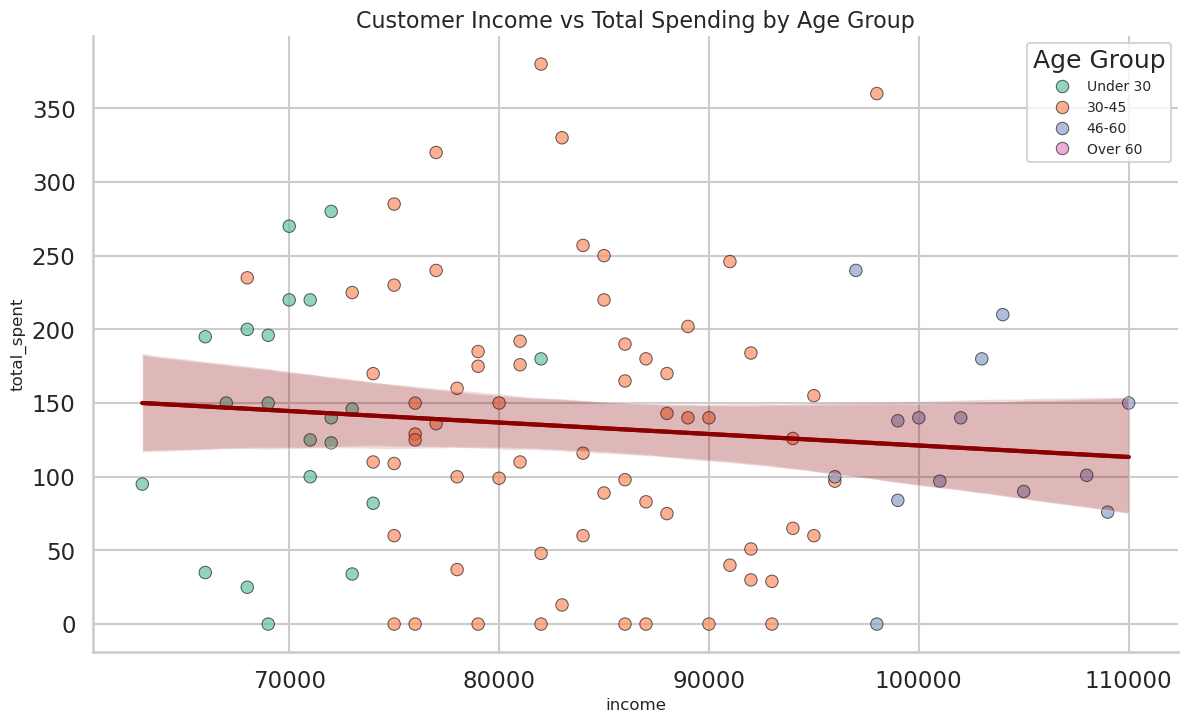

In [154]:
 # LAYER 2: Statistical Trend Line
# =============================================================================
# PURPOSE: Show overall income-spending relationship across all age groups
# CHART TYPE: Regression line with confidence interval
#
# This layer reveals the general trend while the confidence interval
# shows how reliable this relationship is

print("📈 Adding Layer 2: Overall trend line...")

# TODO: Add a regression line showing the overall income-spending relationship
# Hint: Use sns.regplot() with these parameters:
# - data=customer_analysis
# - x='income'
# - y='total_spent'
# - scatter=False (only show the line, not points)
# - color='darkred' (make it stand out from the colored points)
# - line_kws={'linewidth': 3} (thicker line for visibility)
# - ax=ax


# LAYER 2: Statistical Trend Line
# =============================================================================
print("📈 Adding Layer 2: Overall trend line...")

import seaborn as sns

# Add a regression line with confidence interval
sns.regplot(
    data=customer_analysis,
    x='income',
    y='total_spent',
    scatter=False,               # do not plot points again
    color='darkred',             # distinct color for trend line
    line_kws={'linewidth': 3},   # thicker line for visibility
    ci=95,                       # 95% confidence interval
    ax=ax
)
fig

🎯 Adding Layer 3: Business reference lines...
🎯 Adding Layer 3: Business reference lines...


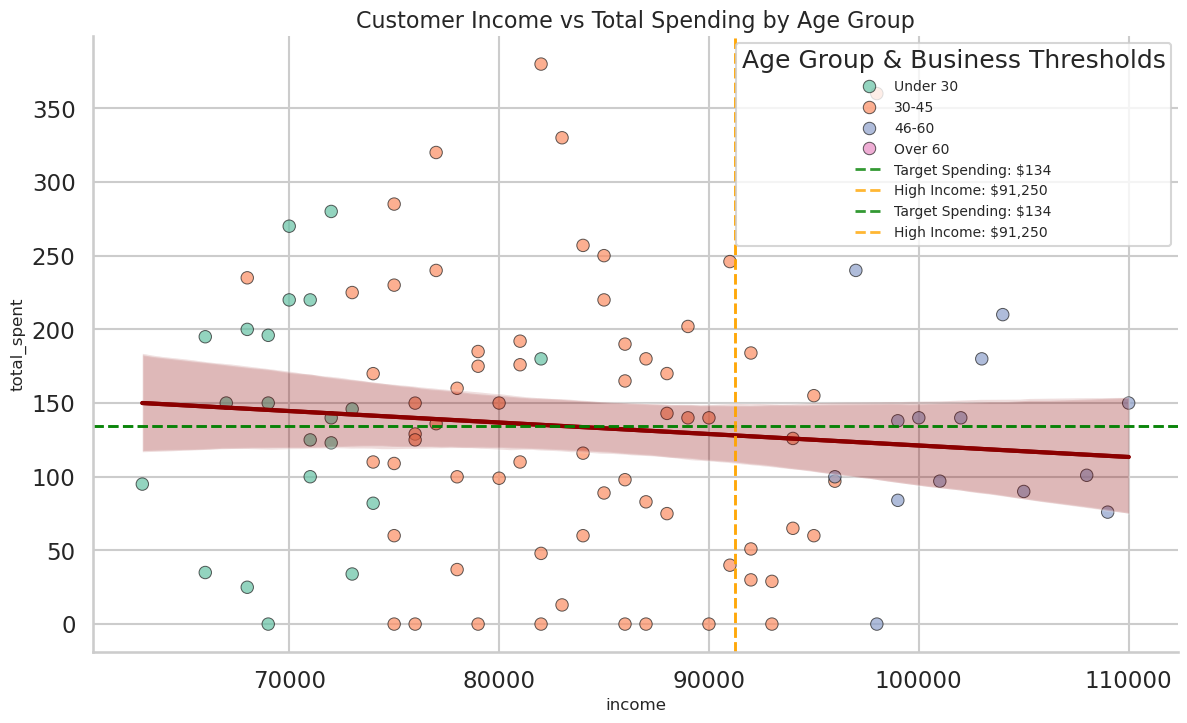

In [156]:
# LAYER 3: Business Target Reference Lines
# =============================================================================
# PURPOSE: Add business context with target/threshold lines
# ELEMENT TYPE: Horizontal and vertical reference lines
#
# These lines help interpret the data in business terms

print("🎯 Adding Layer 3: Business reference lines...")

# TODO: Add horizontal line for target spending threshold
# Hint: Calculate a target spending amount (e.g., average spending)
# target_spending = customer_analysis['total_spent'].mean()
# ax.axhline(target_spending, color='green', linestyle='--', linewidth=2, alpha=0.8, label=f'Target Spending: ${target_spending:.0f}')

# YOUR CODE HERE

# TODO: Add vertical line for high-income threshold
# Hint: Calculate high-income threshold (e.g., 75th percentile)
# high_income_threshold = customer_analysis['income'].quantile(0.75)
# ax.axvline(high_income_threshold, color='orange', linestyle='--', linewidth=2, alpha=0.8, label=f'High Income: ${high_income_threshold:,.0f}')

# LAYER 3: Business Target Reference Lines
# =============================================================================
print("🎯 Adding Layer 3: Business reference lines...")

# 1️⃣ Horizontal line: target spending threshold (e.g., average spending)
target_spending = customer_analysis['total_spent'].mean()
ax.axhline(
    target_spending, 
    color='green', 
    linestyle='--', 
    linewidth=2, 
    alpha=0.8, 
    label=f'Target Spending: ${target_spending:.0f}'
)

# 2️⃣ Vertical line: high-income threshold (e.g., 75th percentile)
high_income_threshold = customer_analysis['income'].quantile(0.75)
ax.axvline(
    high_income_threshold, 
    color='orange', 
    linestyle='--', 
    linewidth=2, 
    alpha=0.8, 
    label=f'High Income: ${high_income_threshold:,.0f}'
)

# Optional: adjust legend to show reference lines clearly
ax.legend(title='Age Group & Business Thresholds', fontsize=10)
fig


📊 Adding Layer 4: Business intelligence annotations...
📊 Adding Layer 4: Business intelligence annotations...


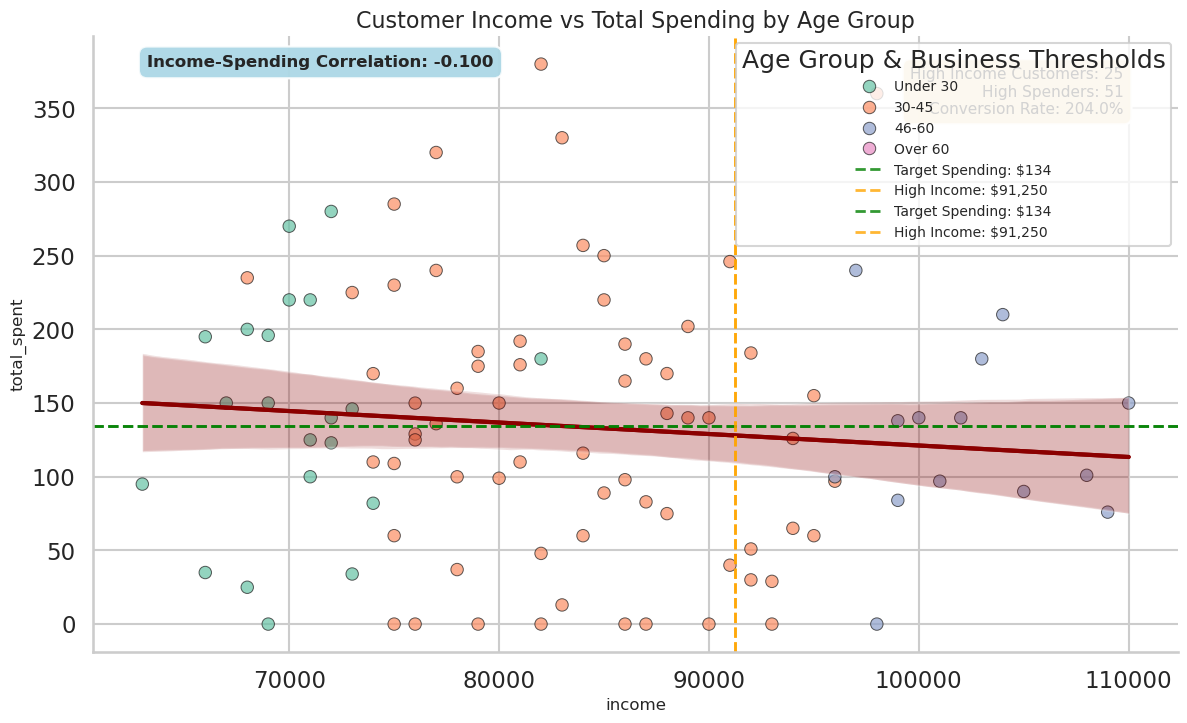

In [158]:
# LAYER 4: Statistical Annotations
# =============================================================================
# PURPOSE: Provide quantitative insights and business intelligence
# ELEMENT TYPE: Multiple text annotations with business context
#
# These annotations tell the story and provide actionable insights

print("📊 Adding Layer 4: Business intelligence annotations...")

# TODO: Calculate correlation between income and spending
# correlation = customer_analysis['income'].corr(customer_analysis['total_spent'])

# YOUR CODE HERE

# TODO: Calculate key business metrics
# high_income_customers = len(customer_analysis[customer_analysis['income'] > high_income_threshold])
# high_spenders = len(customer_analysis[customer_analysis['total_spent'] > target_spending])

# YOUR CODE HERE

# TODO: Add correlation annotation in top-left
# Hint: ax.text(0.05, 0.95, f'Income-Spending Correlation: {correlation:.3f}', 
#              transform=ax.transAxes, fontsize=12, fontweight='bold',
#              bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.8))

# YOUR CODE HERE

# TODO: Add business insights annotation in top-right
# Hint: insight_text = f'High Income Customers: {high_income_customers}\nHigh Spenders: {high_spenders}\nConversion Rate: {(high_spenders/high_income_customers)*100:.1f}%'
# ax.text(0.95, 0.95, insight_text, transform=ax.transAxes, fontsize=11,
#        bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat', alpha=0.8),
#        verticalalignment='top', horizontalalignment='right')

# YOUR CODE HERE
# LAYER 4: Statistical Annotations
# =============================================================================
print("📊 Adding Layer 4: Business intelligence annotations...")

# 1️⃣ Calculate correlation between income and spending
correlation = customer_analysis['income'].corr(customer_analysis['total_spent'])

# 2️⃣ Calculate key business metrics
high_income_customers = len(customer_analysis[customer_analysis['income'] > high_income_threshold])
high_spenders = len(customer_analysis[customer_analysis['total_spent'] > target_spending])

# 3️⃣ Add correlation annotation (top-left corner)
ax.text(
    0.05, 0.95, 
    f'Income-Spending Correlation: {correlation:.3f}', 
    transform=ax.transAxes, 
    fontsize=12, 
    fontweight='bold',
    bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.8)
)

# 4️⃣ Add business insights annotation (top-right corner)
insight_text = (
    f'High Income Customers: {high_income_customers}\n'
    f'High Spenders: {high_spenders}\n'
    f'Conversion Rate: {(high_spenders/high_income_customers)*100:.1f}%'
)
ax.text(
    0.95, 0.95, 
    insight_text, 
    transform=ax.transAxes, 
    fontsize=11,
    bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat', alpha=0.8),
    verticalalignment='top', 
    horizontalalignment='right'
)
fig

👥 Adding Layer 5: Age group insights...
👥 Adding Layer 5: Age group insights...


C:\Users\prati\AppData\Local\Temp\ipykernel_20956\3263591756.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = customer_analysis.groupby('age_group')['total_spent'].mean()


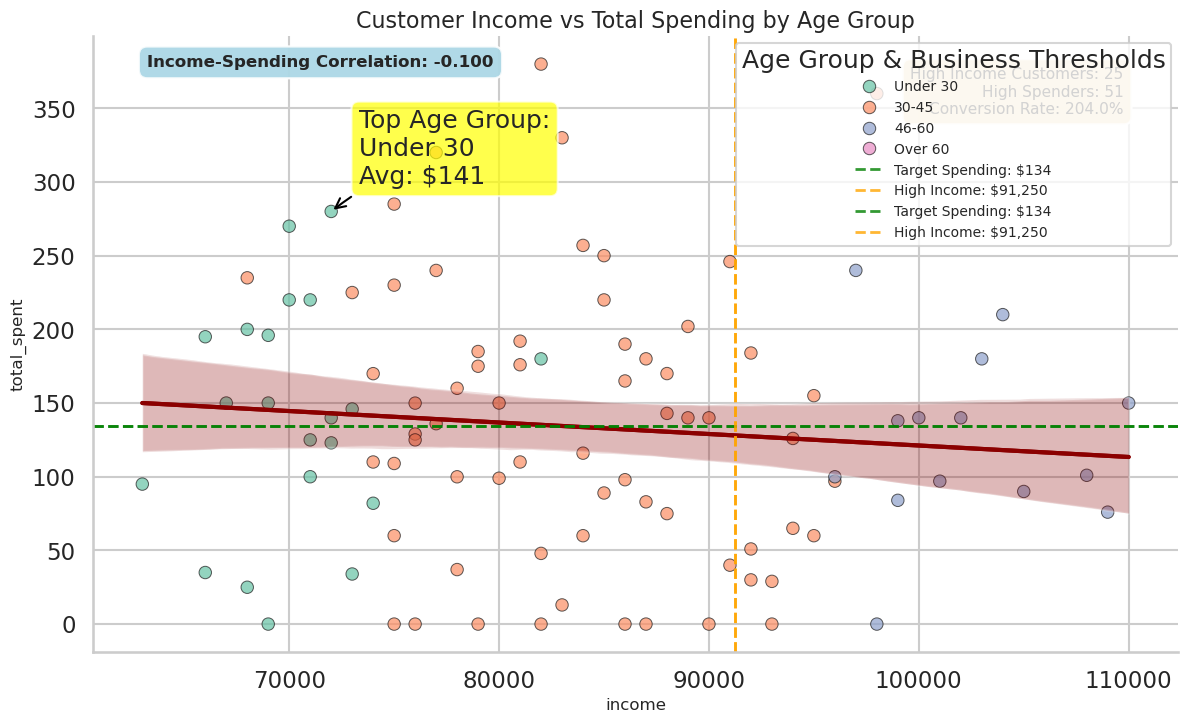

In [160]:
# LAYER 5: Age Group Performance Callouts
# =============================================================================
# PURPOSE: Highlight specific insights about different age groups
# ELEMENT TYPE: Targeted annotations with arrows

print("👥 Adding Layer 5: Age group insights...")

# TODO: Calculate average spending by age group
# age_group_avg = customer_analysis.groupby('age_group')['total_spent'].mean()
# top_age_group = age_group_avg.idxmax()
# top_avg_spending = age_group_avg.max()

# YOUR CODE HERE

# TODO: Add callout for top-performing age group
# Hint: Find a customer from the top age group to annotate
# top_customer = customer_analysis[customer_analysis['age_group'] == top_age_group].nlargest(1, 'total_spent')
# if not top_customer.empty:
#     ax.annotate(f'Top Age Group:\n{top_age_group}\nAvg: ${top_avg_spending:.0f}',
#                xy=(top_customer['income'].iloc[0], top_customer['total_spent'].iloc[0]),
#                xytext=(20, 20), textcoords='offset points',
#                bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
#                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1', color='black'))


# YOUR CODE HERE
# LAYER 5: Age Group Performance Callouts
# =============================================================================
print("👥 Adding Layer 5: Age group insights...")

# 1️⃣ Calculate average spending by age group
age_group_avg = customer_analysis.groupby('age_group')['total_spent'].mean()
top_age_group = age_group_avg.idxmax()
top_avg_spending = age_group_avg.max()

# 2️⃣ Identify a top customer from the top-performing age group
top_customer = customer_analysis[customer_analysis['age_group'] == top_age_group].nlargest(1, 'total_spent')

# 3️⃣ Add callout annotation for top-performing age group
if not top_customer.empty:
    ax.annotate(
        f'Top Age Group:\n{top_age_group}\nAvg: ${top_avg_spending:.0f}',
        xy=(top_customer['income'].iloc[0], top_customer['total_spent'].iloc[0]),
        xytext=(20, 20),                 # offset text from the point
        textcoords='offset points',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
        arrowprops=dict(
            arrowstyle='->', 
            connectionstyle='arc3,rad=0.1', 
            color='black'
        )
    )
fig


✨ Adding professional styling...


<Figure size 640x480 with 0 Axes>

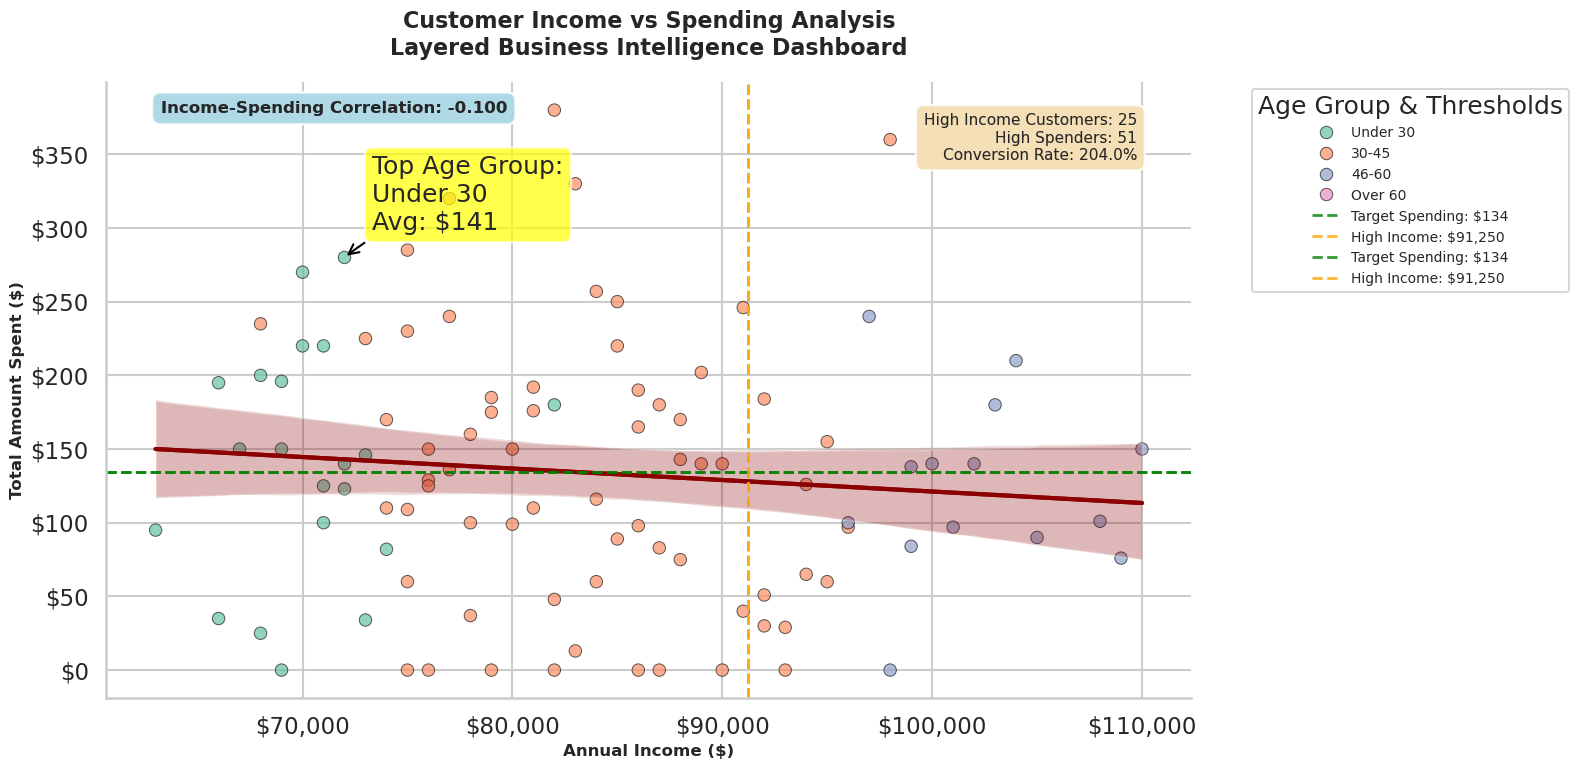

In [162]:
# STEP 12: Professional Styling and Layout
# =============================================================================
print("✨ Adding professional styling...")

import matplotlib.pyplot as plt

# 1️⃣ Add comprehensive title
ax.set_title(
    'Customer Income vs Spending Analysis\nLayered Business Intelligence Dashboard',
    fontsize=16, 
    fontweight='bold', 
    pad=20
)

# 2️⃣ Add clear axis labels with business context
ax.set_xlabel('Annual Income ($)', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Amount Spent ($)', fontsize=12, fontweight='bold')

# 3️⃣ Add legend for age groups and reference lines, outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title='Age Group & Thresholds')

# 4️⃣ Format axes to show currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# 5️⃣ Apply layout and display
plt.tight_layout()
plt.show()
fig